In [ ]:
!pwd
!tar -xf dices.tar
!rm dices.tar

/content


In [ ]:
import matplotlib.pyplot as plt
import skimage.io as skio
import skimage
import numpy as np
import skimage.morphology as morpho
from sklearn.cluster import KMeans

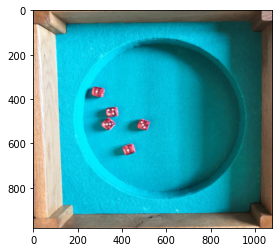

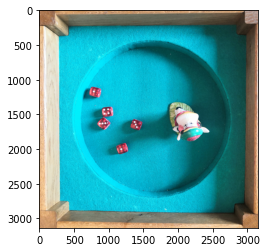

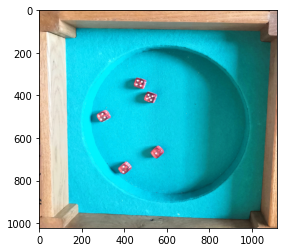

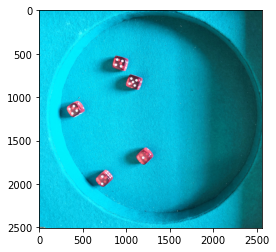

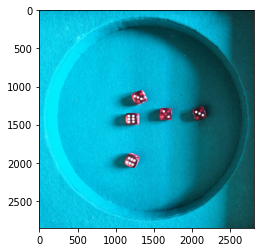

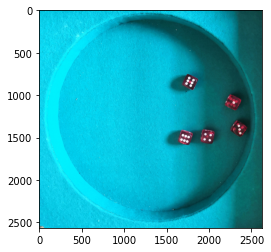

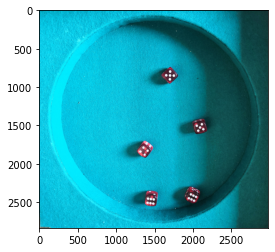

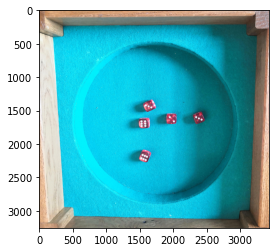

In [ ]:
img_path = 'dices/dices'
extension = '.jpg'
imgs = []
for i in range(1, 9):
  imgs.append(skio.imread(img_path + str(i) + extension))
  plt.imshow(imgs[i-1])
  plt.show()

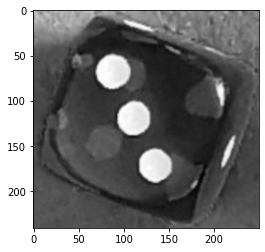

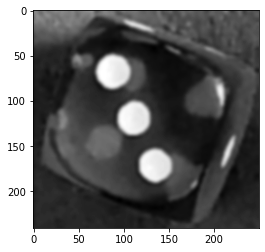

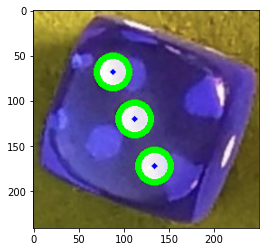

In [229]:
import cv2
import numpy as np

# Read image.
img = skio.imread('dice_test.jpeg', as_gray=True)
plt.imshow(img, cmap='gray')
plt.show()

# strell = morpho.disk(5)
# top_hat = img-morpho.opening(img,strell)
# plt.figure(figsize = (5,5))
# plt.imshow(top_hat,cmap = "gray")
# plt.show()

# Convert to grayscale.
img = skio.imread('dice_test.jpeg', as_gray=False)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

(m,n,j) = img.shape

gray_blurred = cv2.GaussianBlur(gray, (9, 9), 0)
plt.imshow(gray_blur,cmap='gray')
plt.show() 

detected_circles = cv2.HoughCircles(gray_blurred,
                   cv2.HOUGH_GRADIENT, 1, int(min((m,n))/10), param1=100, param2=30,
                   minRadius = 1, maxRadius = int(max((m,n))/3))

# Draw circles that are detected.
if detected_circles is not None:
    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))
    fig, ax = plt.subplots()
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
        cv2.circle(img, (a, b), r, (0, 255, 0), 5)
        # Draw a small circle (of radius 1) to show the center.
        cv2.circle(img, (a, b), 1, (0, 0, 255), 3)
        cv2.waitKey(0)

plt.imshow(img)
plt.show() 


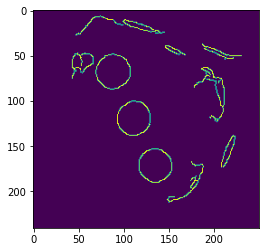

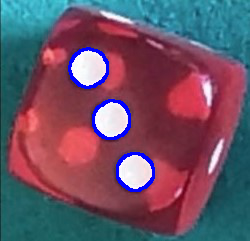

-1

In [241]:
# Convert to grayscale.
img = skio.imread('dice_test.jpeg', as_gray=False)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 50, 350)
plt.imshow(edged)
plt.show() 
cnts, hier  = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

thresh, im_bw = cv2.threshold(gray, 0.9, 1, cv2.THRESH_BINARY) #im_bw: binary image
contours, hierarchy = cv2.findContours(im_bw,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

idx = 0
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)

contour_list = []
for contour in cnts:
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    area = cv2.contourArea(contour)
    if ((len(approx) < 18) & (area > 100) ):
      contour_list.append(contour)

from google.colab.patches import cv2_imshow
cv2.drawContours(img, contour_list,  -1, (255,0,0), 2)
cv2_imshow(img)
cv2.waitKey(0)

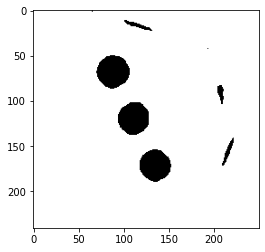

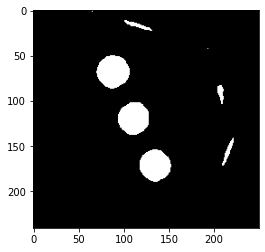

AttributeError: ignored

In [248]:
img = skio.imread('dice_test.jpeg', as_gray=True)
bin_img = img < 0.8
new_bin_img = 2**bin_img % 2

plt.imshow(bin_img,cmap='gray')
plt.show()
plt.imshow(new_bin_img,cmap='gray')
plt.show()

from skimage.measure import label, regionprops, regionprops_table
import math
label_img = label(new_bin_img)
regions = regionprops(label_img)

for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    print(props)
    x1 = x0 + math.cos(orientation) * 0.5 * props.axis_minor_length
    y1 = y0 - math.sin(orientation) * 0.5 * props.axis_minor_length
    x2 = x0 - math.sin(orientation) * 0.5 * props.axis_major_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.axis_major_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)

ax.axis((0, 600, 600, 0))
plt.show()